In [1]:
##Option1 is the script where we divided the training set into train and validation set


# Loading required libraries:
## Sklearn modules
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

###modules for preprocessing, training, test data and validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
## Classification
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

##PLotting modules
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib.colors import ListedColormap

In [2]:
data = pd.read_csv("diabetes.csv")
data.head() 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## data shape
row, columns = data.shape 
print ('Number of rows', row)
print ('Number of columns', columns)

Number of rows 768
Number of columns 9


In [4]:
# Data descriptions 
print(data.describe().T)



                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

In [5]:
#data types
print (data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [6]:
##copying data
data_copy= data.copy(deep=True)

In [7]:
#Replacing zero values with NaN for selected columns
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]= data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0,np.NaN)

In [8]:
## Count of NaN's in the data
print (data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [9]:
# Coulumn with categorical values
data_size=data_copy.groupby('Outcome').size()
print ('Absent', 'Present', ':', data_size)

Absent Present : Outcome
0    500
1    268
dtype: int64


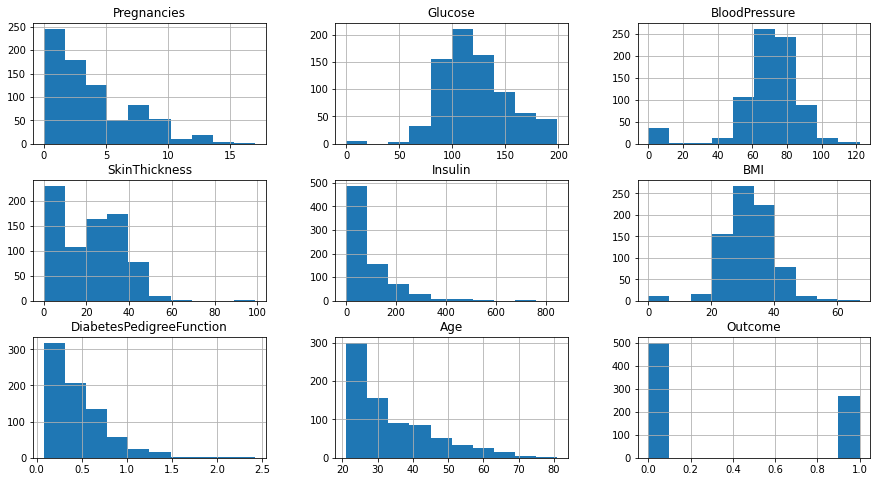

In [10]:
##Distribution of data for each column
plots= data.hist(figsize=(15,8))


In [11]:
#Imputation
data_copy=pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(data_copy), columns = data_copy.columns)

data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.000000,72.000000,35.00000,155.548223,33.600000,0.627,50.0,1.0
1,1.0,85.000000,66.000000,29.00000,155.548223,26.600000,0.351,31.0,0.0
2,8.0,183.000000,64.000000,29.15342,155.548223,23.300000,0.672,32.0,1.0
3,1.0,89.000000,66.000000,23.00000,94.000000,28.100000,0.167,21.0,0.0
4,0.0,137.000000,40.000000,35.00000,168.000000,43.100000,2.288,33.0,1.0
5,5.0,116.000000,74.000000,29.15342,155.548223,25.600000,0.201,30.0,0.0
6,3.0,78.000000,50.000000,32.00000,88.000000,31.000000,0.248,26.0,1.0
7,10.0,115.000000,72.405184,29.15342,155.548223,35.300000,0.134,29.0,0.0
8,2.0,197.000000,70.000000,45.00000,543.000000,30.500000,0.158,53.0,1.0
9,8.0,125.000000,96.000000,29.15342,155.548223,32.457464,0.232,54.0,1.0


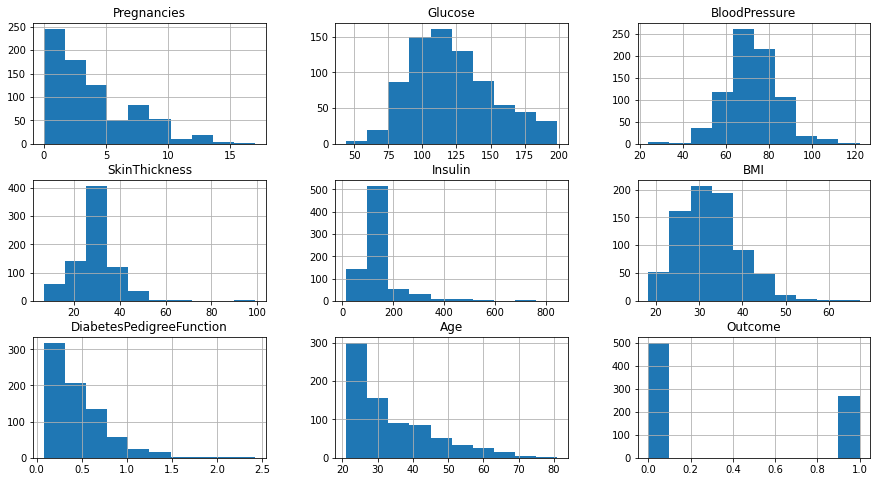

In [12]:
##Plotting after imputation
plots= data_copy.hist(figsize=(15,8))

In [13]:
#### Count of NaN's in the data after imputation
print (data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
#Changin decimal to int for Outcome column
data_copy['Outcome']=data_copy['Outcome'].astype(int)

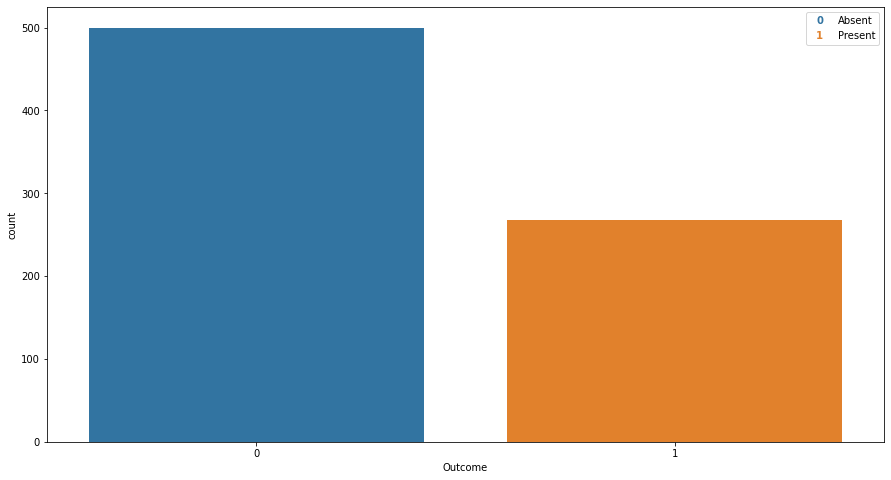

In [15]:
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]
## Bar plot for Column diagnosis
sns.set_style()
plt.figure(figsize=(15,8))
ax=sns.countplot(x='Outcome',data=data_copy)
textname= "0 1".split()
labels= "Absent Present".split()
t = ax.get_xticklabels()
labeldic = dict(zip(textname, labels))
labels = [labeldic[h.get_text()]  for h in t]
# print (labels)
# handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
handles_list=[]
for h,c in zip(t,ax.patches):
    handles = h.get_text(),c.get_fc()
    handles_list.append(handles)



ax.legend(handles_list, labels, handler_map={tuple : TextHandler()}) 
plt.show()

In [16]:
## creating training and test data set
x = data_copy.drop(columns= 'Outcome')

y= data['Outcome']


In [17]:
#scaling the values using Standard Scalar Library
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print (pd.DataFrame(x, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']))


     Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
0       0.639947  8.651081e-01  -3.351824e-02   6.655021e-01 -3.345079e-16   
1      -0.844885 -1.206162e+00  -5.298590e-01  -1.746338e-02 -3.345079e-16   
2       1.233880  2.015813e+00  -6.953060e-01   8.087936e-16 -3.345079e-16   
3      -0.844885 -1.074652e+00  -5.298590e-01  -7.004289e-01 -7.243887e-01   
4      -1.141852  5.034578e-01  -2.680669e+00   6.655021e-01  1.465506e-01   
5       0.342981 -1.869654e-01   1.319287e-01   8.087936e-16 -3.345079e-16   
6      -0.250952 -1.436303e+00  -1.853434e+00   3.240194e-01 -7.950054e-01   
7       1.827813 -2.198427e-01   1.175571e-15   8.087936e-16 -3.345079e-16   
8      -0.547919  2.476096e+00  -1.989652e-01   1.803778e+00  4.560094e+00   
9       1.233880  1.089303e-01   1.951845e+00   8.087936e-16 -3.345079e-16   
10      0.046014 -3.842292e-01   1.620951e+00   8.087936e-16 -3.345079e-16   
11      1.827813  1.522654e+00   1.319287e-01   8.087936e-16 -3.

In [18]:
#Spliting test datase as 30%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) 
print (len(x_train))
print (len(x_test))
print (len(y_train))
print (len(y_test))

537
231
537
231


In [19]:
#pip install openpyxl

You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


[0.6910901467505242, 0.7283018867924528, 0.7430118798043326, 0.7466457023060796, 0.7410552061495457, 0.7411250873515025, 0.7540880503144655, 0.7559399021663171, 0.774493361285814, 0.7614954577218727, 0.7651991614255765, 0.7595737246680644, 0.765234102026555, 0.7653039832285116, 0.763382250174703]
The maximum cross validation score is 0.774493361285814 at K = 17
The minimum error rate is 0.22550663871418597 at K = 17


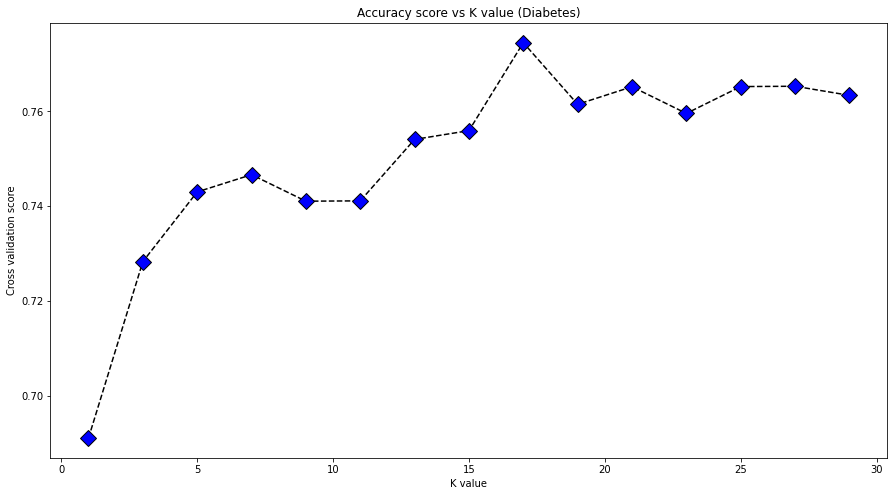

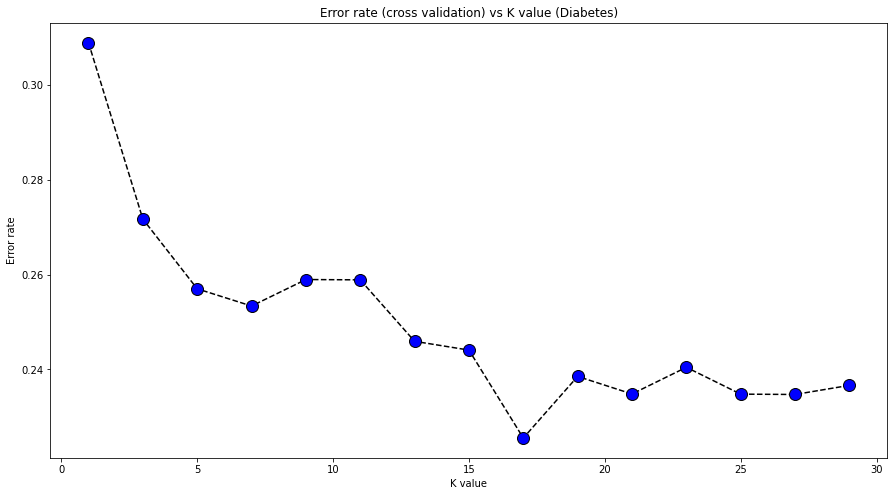

In [19]:
For_graph={}
## KNN cross validation for K value
cross_valscores_list=[]
error_rate_list = []
k_number=[]
for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i, weights= 'uniform', algorithm = 'auto')
    cross_val= cross_val_score(knn, x_train, y_train, cv=10, scoring = 'accuracy')
    cross_valscores_list.append(cross_val.mean())
    error_rate_list.append(1-cross_val.mean())
    cross_valscores_dictdata= (i,cross_val.mean(),1-cross_val.mean(),'Diabetes' )
    k_number.append(i)
    For_graph.setdefault('Diabetes', []).append(cross_valscores_dictdata)

print (cross_valscores_list)

plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), cross_valscores_list, color = 'black', linestyle='dashed', marker = 'D', markerfacecolor = 'blue', markersize = 12)

plt.title('Accuracy score vs K value (Diabetes)')
plt.xlabel('K value')
plt.ylabel('Cross validation score')

print ("The maximum cross validation score is {} at K = {}".format(max(cross_valscores_list), k_number[cross_valscores_list.index(max(cross_valscores_list))]))

plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), error_rate_list, color = 'black', linestyle='dashed', marker = 'o', markerfacecolor = 'blue', markersize = 12)

plt.title('Error rate (cross validation) vs K value (Diabetes)')
plt.xlabel('K value')
plt.ylabel('Error rate')

print ("The minimum error rate is {} at K = {}".format(min(error_rate_list), k_number[error_rate_list.index(min(error_rate_list))]))

Diabetes_df=pd.DataFrame(For_graph)
#Diabetes_df
#Diabetes_df.to_excel('Diabetes_df.xlsx')
Diabetes_df.to_excel("Diabetes_df.xlsx",sheet_name='Sheet_name_1')  

uniform
17
[[139  18]
 [ 37  37]]


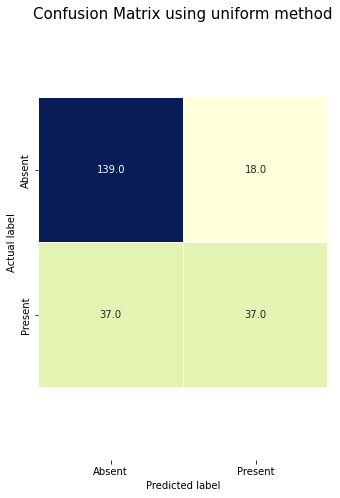

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.67      0.50      0.57        74

    accuracy                           0.76       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.75      0.76      0.75       231

****
distance
17
[[138  19]
 [ 34  40]]


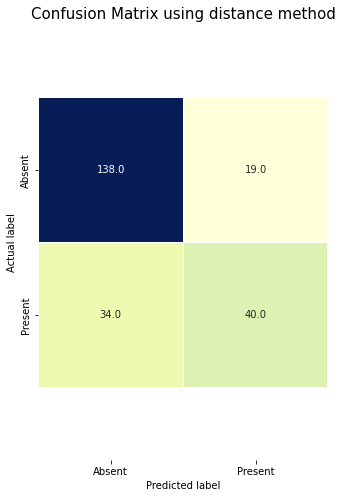

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.68      0.54      0.60        74

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231

****


In [21]:
## selecting K  from cross validation
for weights in ["uniform", "distance"]:
    print (weights)
    selected_k= k_number[error_rate_list.index(min(error_rate_list))]
    print (selected_k)
    knn_neighnour=KNeighborsClassifier(n_neighbors=selected_k, weights= weights, algorithm = 'auto')
    knn_neighnour.fit(x_train, y_train)
    y_predict = knn_neighnour.predict(x_test)
    print(confusion_matrix(y_test,y_predict))
    cm= confusion_matrix(y_test,y_predict)
    df = pd.DataFrame(cm, index= ['Absent', 'Present'], columns = ['Absent', 'Present'])
    
    plt.figure(figsize=(15,8))
    sns.heatmap(df, annot = True, cbar = False, fmt = '.1f', linewidths = .3, square = True, cmap='YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title('Confusion Matrix using {} method'.format(weights), size = 15 );
    b,t = plt.ylim()
    b += 0.5
    t-= 0.5
    plt.ylim(b,t)
    plt.show()
    
    
    
    print(classification_report(y_test,y_predict))  
    print ('*'*4)
    